### Integrantes

- Sebastian Allende
- Gianfranco Astorga
- Oscar Horta

### Profesor
    Dario Rojas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('student-por.csv') # Lectura de datos

### Análisis estadístico descriptivos

Este conjunto de datos aborda el rendimiento estudiantil en la educación secundaria de **dos** escuelas portuguesas. 

Los atributos de los datos incluyen las calificaciones de los **estudiantes, características demográficas, sociales y relacionadas con la escuela, y se recopilaron utilizando informes escolares y cuestionarios**. 

Se proporcionan dos conjuntos de datos con respecto al rendimiento en dos materias distintas: **Matemáticas (mat) y Lengua Portuguesa (por)**. En [Cortez y Silva, 2008], los dos conjuntos de datos se modelaron bajo tareas de **clasificación binaria/de cinco niveles y tareas de regresión**. 

Nota importante: el atributo objetivo G3 tiene una fuerte correlación con los atributos G2 y G1. Esto ocurre porque G3 es la calificación del último año (emitida en el tercer período), mientras que G1 y G2 corresponden a las calificaciones del primer y segundo período. Es más difícil predecir G3 sin G2 y G1, pero dicha predicción es mucho más útil (consulte la fuente del artículo para obtener más detalles).

DataSet : https://www.kaggle.com/datasets/larsen0966/student-performance-data-set?resource=download





In [88]:
df = data.copy(deep=True) # Copia de datos para trabajar y df por data frame

print('Data Shape:',df.shape) # Cantidad de columnas y filas de los datos
# print(df.info())
display(df.head()) # Primeros 5 datos de la tabla para ver como estan los datos

Data Shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [103]:

print('\nDescripción de los datos')
display(df.select_dtypes(include=np.number).describe()) # Descripcion de los datos numericos (int y float) de la tabla y sus estadisticas


Descripción de los datos


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [90]:
# Aqui definimos las columnas que son continuas y discretas para poder trabajar con ellas
continua_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
discreta_columns = ['famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
continuas_seleccionadas = ["age","Medu","Fedu","Dalc","Walc","absences","G1","G2","G3"] 

In [134]:
# 1. Media
print('\nMedia columnas seleccionadas:')
# media_columnas = df[continuas_seleccionadas].mean() # Media de las columnas seleccionadas
# display(media_columnas)

media_columnas = []

for columna in continuas_seleccionadas:    
    media = (df[columna].sum() / df[columna].count()).round(2)
    media_columnas.append(media)
    print(f"   {columna}: {media}")


Media columnas seleccionadas:
   age: 16.74
   Medu: 2.51
   Fedu: 2.31
   Dalc: 1.5
   Walc: 2.28
   absences: 3.66
   G1: 11.4
   G2: 11.57
   G3: 11.91


Con respecto a la media de las medidas presentadas se puede decir que con respecto a la edad se tiene un promedio de 16 años, por otra parte hubo una variacion en el promedio de las calificaciones desde G1 hasta G3, donde G3 fue el mayor puntaje obtenido de las calificaciones con un valor de 11.91 y G1 el menor con 11.4 en promedio.

In [186]:
# 2. Calcula la Media Ponderada de las columnas con datos continuos
print('\nMedia Ponderada columnas seleccionadas:')
# media_ponderada_columnas = df[continuas_seleccionadas].multiply(df['G3'], axis="index").sum() / df['G3'].sum() # Media ponderada de las columnas seleccionadas 
# display(media_ponderada_columnas)   

media_ponderada_columnas = []
for columna in continuas_seleccionadas:
    media_ponderada = (df[columna].multiply(df['G3'], axis="index").sum() / df['G3'].sum()).round(2)
    media_ponderada_columnas.append(media_ponderada)
    print(f"   {columna}: {media_ponderada}")


Media Ponderada columnas seleccionadas:
   age: 16.71
   Medu: 2.59
   Fedu: 2.37
   Dalc: 1.45
   Walc: 2.22
   absences: 3.54
   G1: 12.01
   G2: 12.3
   G3: 12.78


Al analizar la media ponderada y comparar a al calculo anterior se puede notar mayor diferencia entre los valores obtenidos en G1 y G3 previamente con el nuevo valor de 12.78 en promedio en la tercera evaluacion del curso (G3), es importante considerar que el calculo de la media ponderada nos ayuda a refinar el calculo de los valores al asignar un peso a los datos con respecto a las ponderaciones y disminuir la influencia de valores atipicos en la medicion.

In [189]:
# 3. Mediana
print('\nMediana columnas seleccionadas:')
# mediana_columnas = df[continuas_seleccionadas].median() # Mediana de las columnas seleccionadas
# display(mediana_columnas)

medianas_columnas = []

for columna in continuas_seleccionadas:
    mediana = df[columna].median()
    medianas_columnas.append(mediana)
    print(f"   {columna}: {mediana}")


Mediana columnas seleccionadas:
   age: 17.0
   Medu: 2.0
   Fedu: 2.0
   Dalc: 1.0
   Walc: 2.0
   absences: 2.0
   G1: 11.0
   G2: 11.0
   G3: 12.0


Estos valores representan el punto medio de cada una de las variables del conjunto de la base de datos. 

Variable Edad: Significa que aproximadamente la mitad de los estudiantes tienen 17 años o menos y la otra mitad tiene 17 años o más.

Variable Calificaciones: Indica que la mitad de los estudiants obtuvieron calificaciones igual o inferiores a 11 en los periodos G1 y G2, y la otra mitad obtuvo calificaciones iguales o superiores a 11 en esos períodos.


In [243]:
# 4. Percentil(10,25,50,75,90)

# Calcular los percentiles 10, 25, 50 (mediana), 75 y 90 para las columnas continuas seleccionadas
percentiles = np.percentile(df[continuas_seleccionadas], [10, 25, 50, 75, 90], axis=0)
for i in range(len(percentiles)):
    print(f"Percentil {i+1}: {percentiles[i]}")


Percentil 1: [15.   1.   1.   1.   1.   0.   8.   8.   8.8]
Percentil 2: [16.  2.  1.  1.  1.  0. 10. 10. 10.]
Percentil 3: [17.  2.  2.  1.  2.  2. 11. 11. 12.]
Percentil 4: [18.  4.  3.  2.  3.  6. 13. 13. 14.]
Percentil 5: [18.  4.  4.  3.  4. 10. 15. 15. 16.]


Percentil (10): Indica el valor por debajo del cual se encuetra el 10% de los datos. La variable 'Age' el 10% de los estudiantes tienen 15 años o menos.
Percentil (25): Representa el limite inferior del primer cuartil de la distribuicion. La variable 'Age' el 25% de los estudiantes tienen 16 años o menos.
Percentil (50): Es el valor que divide en dos partes iguales la distribucion. La variable 'Age' es la mediana con 17 años.
Percentil (75): Representa el limite inferior del tercer cuartil de la distribucion. La variable 'Age' el 75% de los estudiantes tienes 18 años o menos.
Percentil (90): Indica el valor por debajo del cual se encuentra el 90% de los datos. El 90% de los estudiantes tienen 18 años o menos.

---

0.10 (10%): El 10% de los datos en cada variable es igual o menor que estos valores. Por ejemplo, en la columna "age", el 10% de los estudiantes tienen una edad de 15 años o menos.
0.25 (25%): El 25% de los datos en cada variable es igual o menor que estos valores. Esto es equivalente al primer cuartil. En la columna "Medu", el 25% de los estudiantes tiene una educación materna de 2 o menos.
0.50 (50%): El 50% de los datos en cada variable es igual o menor que estos valores, lo que equivale a la mediana. En la columna "G1", la mediana de las calificaciones del primer período es 11.
0.75 (75%): El 75% de los datos en cada variable es igual o menor que estos valores. Esto es equivalente al tercer cuartil. En la columna "Dalc", el 75% de los estudiantes tiene un consumo de alcohol durante la semana igual o menor a 2.
0.90 (90%): El 90% de los datos en cada variable es igual o menor que estos valores. Esto significa que solo el 10% de los datos restantes supera estos valores. Por ejemplo, en la columna "G3", el 90% de las calificaciones finales son 16 o menos.



In [238]:
# 5. Mediana Ponderada(igual que 2)
print('\nMediana Ponderada columnas seleccionadas:')

medianas_ponderadas_columnas = []
for columna in continuas_seleccionadas:
    valores_ponderados = df[columna]
    mediana_ponderada = (valores_ponderados.sum() / valores_ponderados.count()).round(2)
    medianas_ponderadas_columnas.append(mediana_ponderada)
    print(f"   {columna}: {mediana_ponderada}")

    


Mediana Ponderada columnas seleccionadas:
   age: 16.74
   Medu: 2.51
   Fedu: 2.31
   Dalc: 1.5
   Walc: 2.28
   absences: 3.66
   G1: 11.4
   G2: 11.57
   G3: 11.91


Sugiere que la mayoría de los estudiantes están obteniendo calificaciones por debajo del promedio, lo que podría indicar un rendimiento académico generalmente deficiente en estas asignaturas

In [240]:
# 6. Media Cortada(5% de datos extremos descartados)

porcentaje_descartado = 0.05
num_datos_descartados = int(len(df) * porcentaje_descartado)


g1_datos = df['G1'].values
g1_datos_ordenados = np.sort(g1_datos)
g1_datos_recortados = g1_datos_ordenados[num_datos_descartados:-num_datos_descartados]
media_cortada_g1 = np.mean(g1_datos_recortados)

# Calcula la media cortada del 5% de datos extremos descartados para G2
g2_datos = df['G2'].values
g2_datos_ordenados = np.sort(g2_datos)
g2_datos_recortados = g2_datos_ordenados[num_datos_descartados:-num_datos_descartados]
media_cortada_g2 = np.mean(g2_datos_recortados)

# Calcula la media cortada del 5% de datos extremos descartados para G3
g3_datos = df['G3'].values
g3_datos_ordenados = np.sort(g3_datos)
g3_datos_recortados = g3_datos_ordenados[num_datos_descartados:-num_datos_descartados]
media_cortada_g3 = np.mean(g3_datos_recortados)

print('\nMedia Cortada columnas seleccionadas:')

print("   G1:", media_cortada_g1.round(2))
print("   G2:", media_cortada_g2.round(2))
print("   G3:", media_cortada_g3.round(2))


Media Cortada columnas seleccionadas:
   G1: 11.39
   G2: 11.6
   G3: 12.06


Las calificaciones promedio de los estudiantes en el primer trimestre son 11.4, en el segundo trimestre son 11.5 y en el tercer trimestre son 11.9.

Al aplicar la media cortada del 5% a las notas de los trimestres, podemos ver que la media de las notas de los trimestres es de 11.5, lo que significa que la mayoría de los estudiantes mantienen calificaciones estables.


Error Cuadrático Medio (MSE): 1.3663300054550755
Coeficiente de Determinación (R²): 0.859888248512228


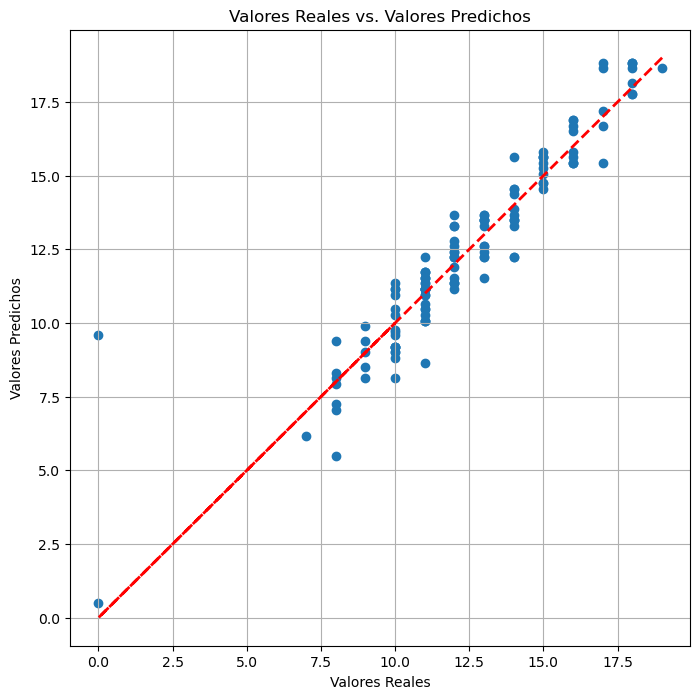

In [34]:
# 7. Error cuadrático Medio

X = df[['G1', 'G2']]  # Utiliza dobles corchetes y una lista para seleccionar múltiples columnas
y = df['G3']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

# Imprimir el valor del error cuadrático medio
print('Error Cuadrático Medio (MSE):', mse)

# Imprimir el valor del coeficiente de determinación (R²)
print('Coeficiente de Determinación (R²):', r2)

# Graficar valores reales vs. valores predichos
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')

# Agregar una línea de regresión ideal (donde y_test = y_pred)
plt.plot(y_test, y_test, color='red', linestyle='--', linewidth=2, label='Línea de Regresión Ideal')

plt.grid(True)
plt.show()


El MSE mide la precisión promedio de las predicciones del modelo. Un valor bajo (1.37) indica buenas predicciones.

El R² indica qué tan bien el modelo se ajusta a los datos reales. Un valor alto (0.86) muestra un buen ajuste y capacidad del modelo para explicar la variabilidad en los datos.

El modelo tiene un buen desempeño en la predicción de la variable objetivo (G3) y puede explicar aproximadamente el 86% de la variabilidad en los datos.

In [251]:
# 8. Desviación estandar

desviacion_estandar = df[continuas_seleccionadas].std()

print('\nDesviación Estandar columnas seleccionadas:')
for label, value in desviacion_estandar.items():
    redondeo = round(value, 2)
    print(f"   {label}: {redondeo}")
    


Desviación Estandar columnas seleccionadas:
   age: 1.22
   Medu: 1.13
   Fedu: 1.1
   Dalc: 0.92
   Walc: 1.28
   absences: 4.64
   G1: 2.75
   G2: 2.91
   G3: 3.23


Con respecto a la desviacion estandar se interpreta que en G3 se obtuvo una mayor variabilidad de 3.23 ptos en los datos con respecto a la media de la misma, lo cual puede generarse por ser la ultima calificacion del semestre y los estudiantes que tuvieron mejor rendimiento mas al termino del semestre deciden relajarse y en consecuencia aumenta la variacion del promedio.

In [252]:
# 9. Rango

rango_G3 = df['G3'].max() - df['G3'].min()
rango_G2 = df['G2'].max() - df['G2'].min()
rango_G1 = df['G1'].max() - df['G1'].min()

# Imprimir el resultado
print('\nRango de las columnas seleccionadas:')
print('  "G3":', rango_G3)
print('  "G2":', rango_G2)
print('  "G1":', rango_G1)



Rango de las columnas seleccionadas:
  "G3": 19
  "G2": 19
  "G1": 19


El rango calculado significa que las calificaciones finales de los estudiantes en el conjunto de datos **varían en un rango de 19 puntos**, desde el valor mínimo hasta el valor máximo

In [242]:
# 10. Mediana de la Desviación absoluta de la mediana

desviaciones_absolutas = df[continuas_seleccionadas].sub(mediana).abs()
mediana_desviacion_absoluta = desviaciones_absolutas.median()

print('\nMediana de la Desviación Absoluta de la Mediana:')

for label, value in mediana_desviacion_absoluta.items():
    print(f"   {label}: {value}")


Mediana de la Desviación Absoluta de la Mediana:
   age: 5.0
   Medu: 10.0
   Fedu: 10.0
   Dalc: 11.0
   Walc: 10.0
   absences: 10.0
   G1: 2.0
   G2: 2.0
   G3: 2.0


En esta medición directamente se puede notar un mayor cambio en el valor de los datos, se puede notar un gran variacion la edad, Medu, Fedu, Dalc, walc y absences lo cual denota mucha dispersion con respecto a la mediana de los datos, lo cual puede notarce de mejor manera en los graficos de boxplot que se presenta a continuacion. Aunque por otra parte si vemos los valores de G1, G2 yG3 los datos parecen ser mas consistentes o cercanos a la mediana, pues sus valores son menores que la desviacion estandar.

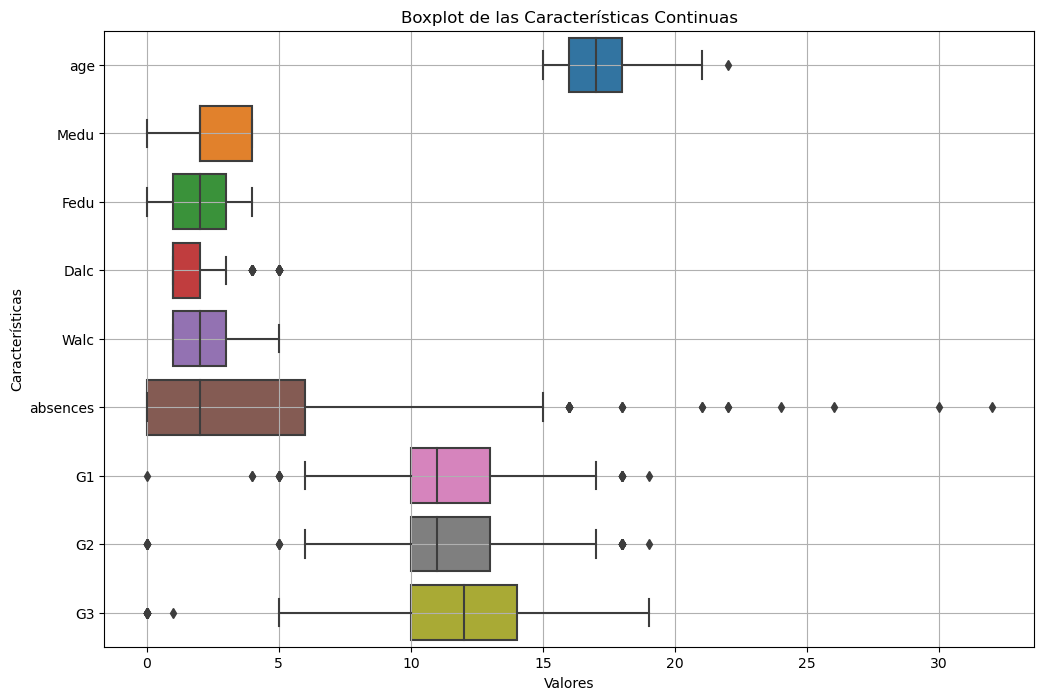

In [245]:
# 11. Boxplot entre características

# Crear un gráfico de caja personalizado
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[continuas_seleccionadas], orient='h')
plt.title('Boxplot de las Características Continuas')
plt.xlabel('Valores')
plt.ylabel('Características')
plt.grid(True)
plt.show()

De los boxplot se puede apreciar claramente como la variable ausencias es la que mayor datos dispersos tiene y la que mayores valores atipicos presenta mientras que en comparacion G3 tiene una distribucion bastante uniforme segun se puede observar en el cajon y sus extremos, aunque igualmente presenta outliers. Pör otra parte G1 y G2 tienen un comportamiento muy similar en sus dispersiones.

In [263]:
# 12. Tabla de frecuencias

from tabulate import tabulate

tabla_frecuencias = []

for columna in continuas_seleccionadas:
    tabla_frecuencias.append([columna, df[columna].value_counts().to_dict()])
    
print('\nTabla de Frecuencias:')
print(tabulate(tabla_frecuencias, headers=['Columna', 'Frecuencias'], tablefmt='orgtbl'))


Tabla de Frecuencias:
| Columna   | Frecuencias                                                                                                                                                                |
|-----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| age       | {17: 179, 16: 177, 18: 140, 15: 112, 19: 32, 20: 6, 21: 2, 22: 1}                                                                                                          |
| Medu      | {2: 186, 4: 175, 1: 143, 3: 139, 0: 6}                                                                                                                                     |
| Fedu      | {2: 209, 1: 174, 3: 131, 4: 128, 0: 7}                                                                                                                                     |
| Dalc      | {1: 451, 2: 121, 3: 43, 5: 1

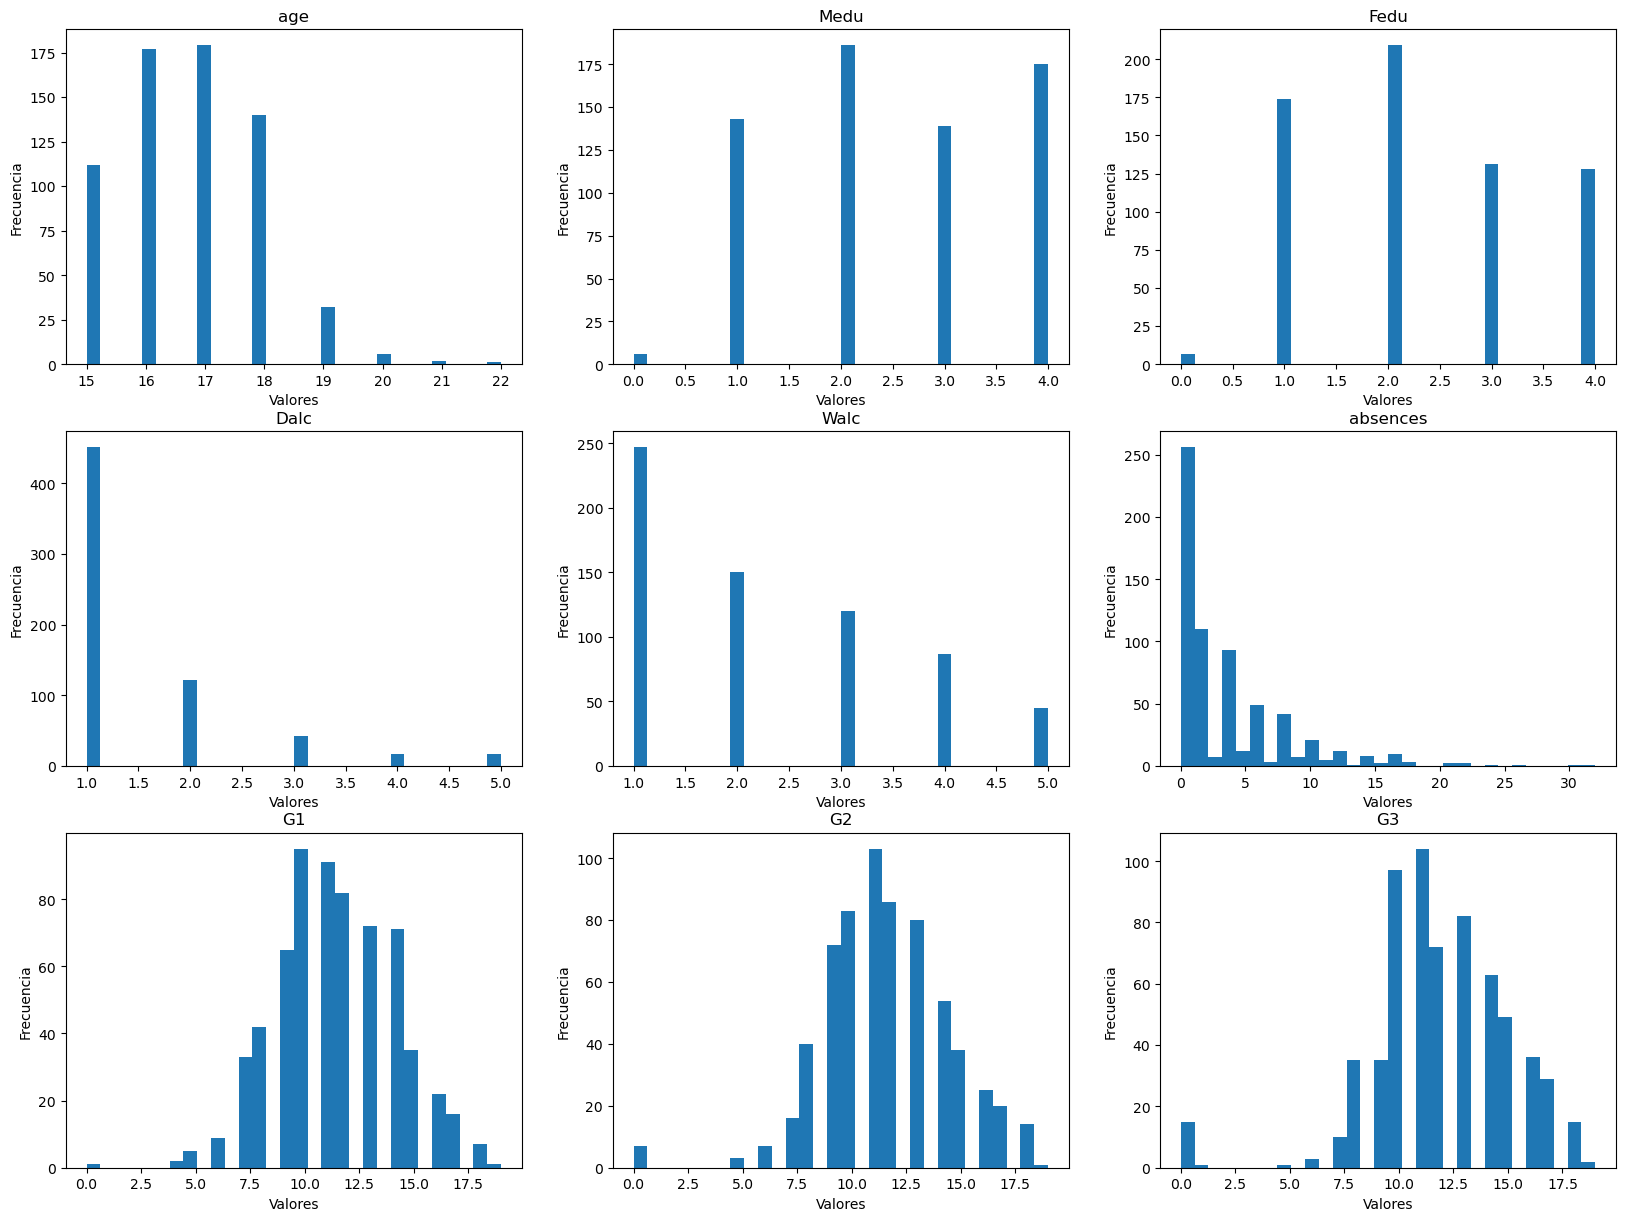

In [92]:
# 13. Histogramas

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()): # flatten() convierte un arreglo multidimensional en un arreglo unidimensional y sirve para recorrerlo sino se usa se recorre por filas
    if i < len(continuas_seleccionadas): # len() devuelve la cantidad de elementos de un arreglo
        ax.hist(df[continuas_seleccionadas[i]], bins=30)
        ax.set_title(continuas_seleccionadas[i])
        ax.set_xlabel("Valores")
        ax.set_ylabel("Frecuencia")
    else:
        ax.set_visible(False)

De los histogramas observados a simple vista se puefe inferir que G1, G2 y G3 presentan una asimetria negativa por lo cual tiene valores mas dispersos a la izquierda de la media.

In [265]:
# 14. Moda
modas = df[continuas_seleccionadas].mode()

print('\nModa de las columnas seleccionadas:')
for label, value in modas.items():
    print(f"   {label}: {value[0]}")



Moda de las columnas seleccionadas:
   age: 17
   Medu: 2
   Fedu: 2
   Dalc: 1
   Walc: 1
   absences: 0
   G1: 10
   G2: 11
   G3: 11


Con respecto a la moda se tine que la edad mas repetida es 17 años, mientras que las calificaciones del primer periodo fue de 10 mientras que en el segundo periodo y en la calificacion final fue de un 11. De los datos tambien se puede decir que la mayoria de los estudiantes no faltaban muy seguido ya que la moda de las ausencias es de cero.

In [274]:
# 15. Frecuencia

def tabla_frecuencias(columna):
    tabla_frecuencias = df[columna].value_counts().to_dict()
    return tabla_frecuencias

print('\nFrecuencia de las columnas seleccionadas:')
print('   "G1":', tabla_frecuencias('G1'))
print('   "G2":', tabla_frecuencias('G2'))
print('   "G3":', tabla_frecuencias('G3')) 


Frecuencia de las columnas seleccionadas:
   "G1": {10: 95, 11: 91, 12: 82, 13: 72, 14: 71, 9: 65, 8: 42, 15: 35, 7: 33, 16: 22, 17: 16, 6: 9, 18: 7, 5: 5, 4: 2, 0: 1, 19: 1}
   "G2": {11: 103, 12: 86, 10: 83, 13: 80, 9: 72, 14: 54, 8: 40, 15: 38, 16: 25, 17: 20, 7: 16, 18: 14, 6: 7, 0: 7, 5: 3, 19: 1}
   "G3": {11: 104, 10: 97, 13: 82, 12: 72, 14: 63, 15: 49, 16: 36, 9: 35, 8: 35, 17: 29, 18: 15, 0: 15, 7: 10, 6: 3, 19: 2, 1: 1, 5: 1}


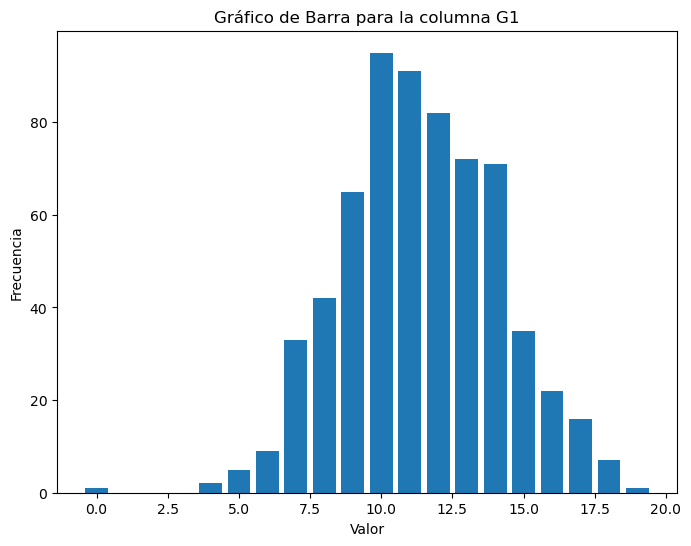

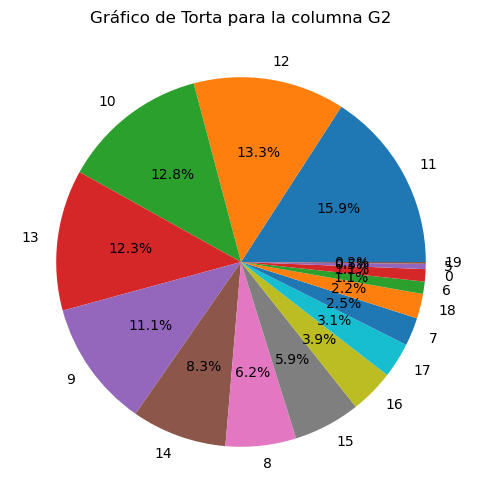

In [278]:
# 16. Graficos de barra y torta simples

tabla_frecuencias_G1 = pd.DataFrame(tabla_frecuencias('G1').items(), columns=['Valor', 'Frecuencia'])
tabla_frecuencias_G2 = pd.DataFrame(tabla_frecuencias('G2').items(), columns=['Valor', 'Frecuencia'])
tabla_frecuencias_G3 = pd.DataFrame(tabla_frecuencias('G3').items(), columns=['Valor', 'Frecuencia'])

# Crear un gráfico de barra simple para G1
plt.figure(figsize=(8, 6))
plt.bar(tabla_frecuencias_G1['Valor'], tabla_frecuencias_G1['Frecuencia'])
plt.title('Gráfico de Barra para la columna G1')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Crear un gráfico de torta simple para G2
plt.figure(figsize=(8, 6))
plt.pie(tabla_frecuencias_G2['Frecuencia'], labels=tabla_frecuencias_G2['Valor'], autopct='%1.1f%%')
plt.title('Gráfico de Torta para la columna G2')
plt.show()


 El gráfico de barras muestra la distribuición de las calificaciones en el periodo G1, para cada barra se representa un valor de calificación, y la altura de la barra indica la frecuencia con la que aparece ese valor en el apartado de los datos.

 El gráfico de torta muestra la proporción de cada valor de calificación en el período G2 en la forma circular dividido por segmentos, cada uno de estas divisiones del circulo representa el valor de calificación, y el porcentaje en cada división indica la proporción de estudiantes que obtuvieron esa calificación en G2.


Coeficiente de correlación


<Axes: >

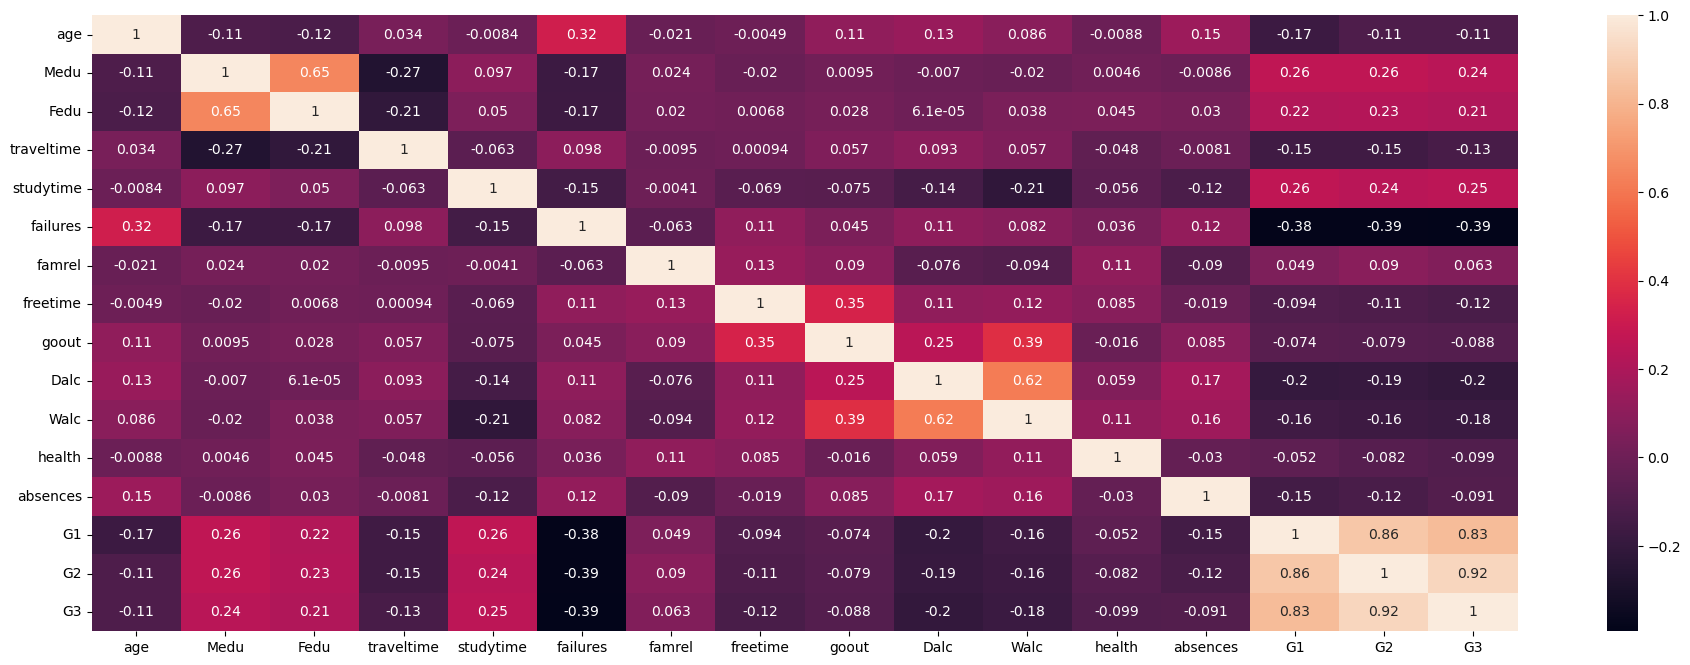

In [279]:
# 17. Coeficiente de correlación entre características o Matriz de correlación(con gráfico)
print('\nCoeficiente de correlación') 
plt.figure(figsize=(23,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True) # Mapa de calor de la correlacion de los datos numericos 

El grafico decorrelacion se interpretan de la siguiente manera:

- 1  : correlación positiva total
- 0  : no hay correlación
- -1 : correlación negativa total

Con estos coeficientes de correlación podemos ver que las variables que más influyen en la nota final son G1, G2 y G3, que son las notas de los tres trimestres. 

También podemos ver que existe una correlación entre las variables de las notas de los trimestres, lo que es lógico, ya que si un alumno tiene buenas notas en el primer trimestre, es probable que también las tenga en el segundo y en el tercero.

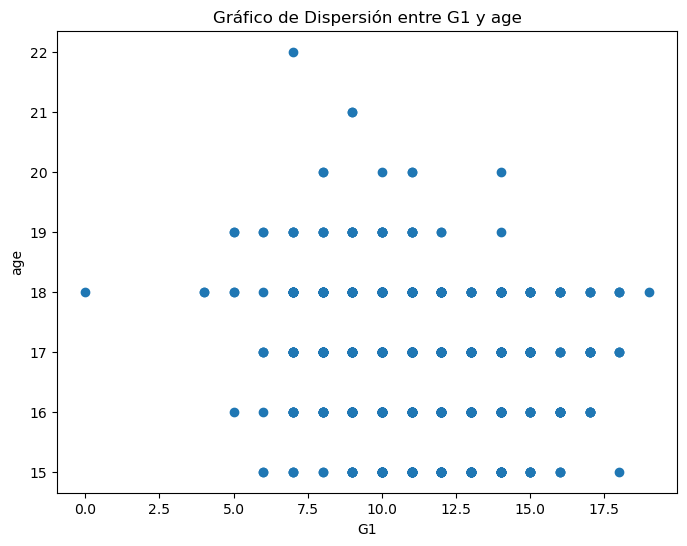

In [283]:
# 18. Gráfico de Dispersión entre características
x = df['G1']
y = df['age']

# Crea el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Gráfico de Dispersión entre G1 y age')
plt.xlabel('G1')
plt.ylabel('age')
plt.show()


El gráfico de dispersión entre G1 y Age se utiliza para visualizar la relación entre dos variables numéricas. Cada punto en el gráfico representa un estudiante en tu conjunto de datos, y la posición de cada punto en el gráfico indica su calificación en G1 y su edad. Determinando asi como se disribuyen los puntos en el gráfico y poder observar si existe alguna tendencia. Por que si existen una tendencia entre los estudiantes de 15 a 18 años y las calificaciones de 7.5 a 15.

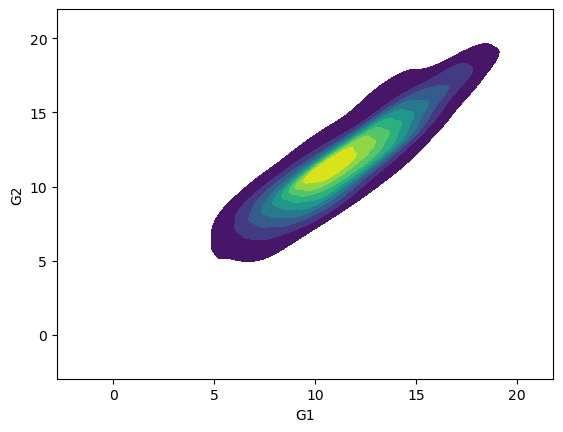

In [307]:
# 19. Gráfico de Contornos

# Seleccionar las columnas 'G1' y 'G2' de tu DataFrame
data = df[['G1', 'G2','age']]

# Crear un gráfico de contornos
sns.kdeplot(data = data, x='G1', y='G2', fill=True, cmap='viridis')

# Mostrar el gráfico
plt.show()

Como se puede observar esta gráfica de contorno nos muestra la relación entre la configuración de G2 y G1 utilizadas para determinar las calificaciones de los estudiantes en función a la edad, destacando las regiones más oscuras la cual resalta las aréas con mayor densidad de puntos, sugiriendo que los estudiantes tienen calificaciones similares y la region más clara sugiere estudiantes con calificaciones más bajas.

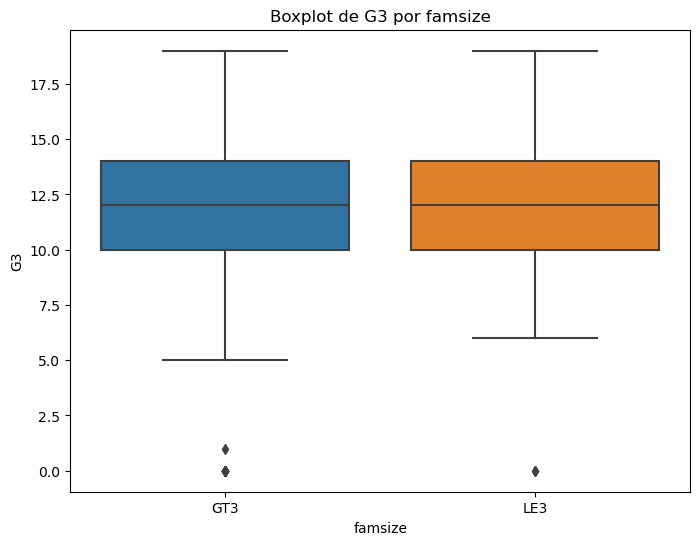

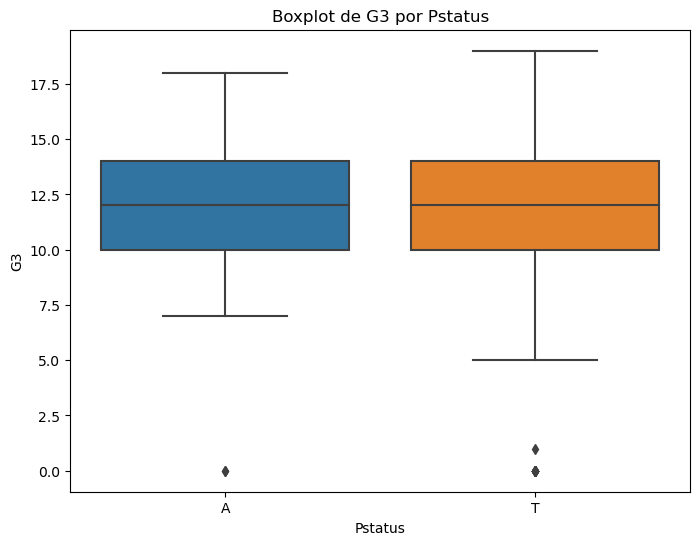

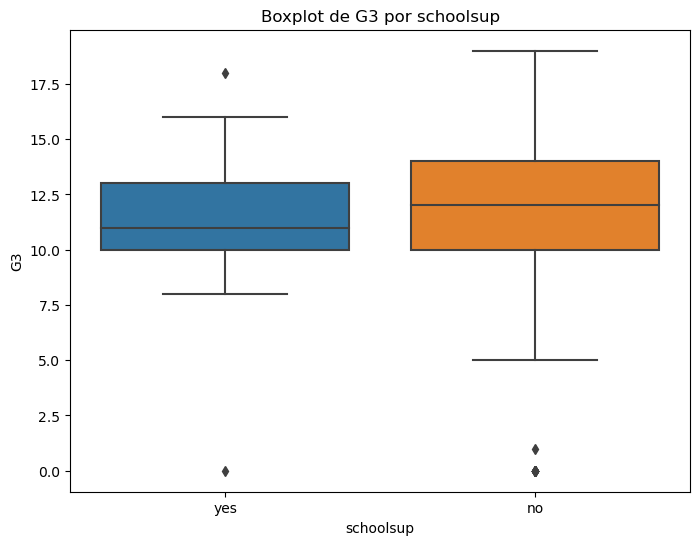

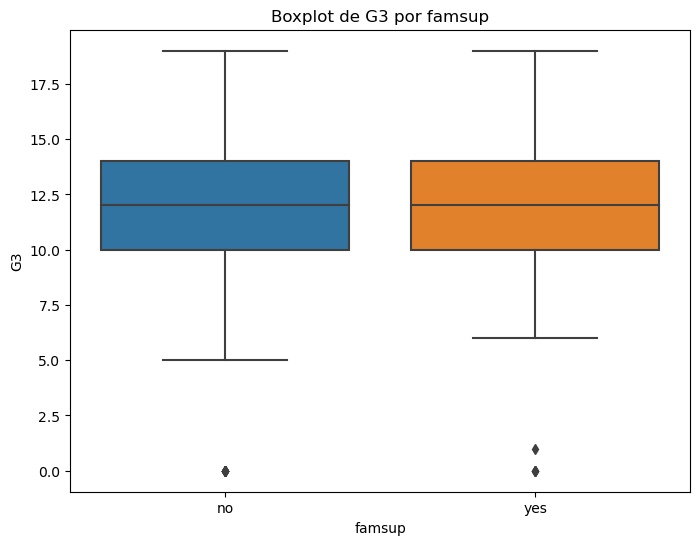

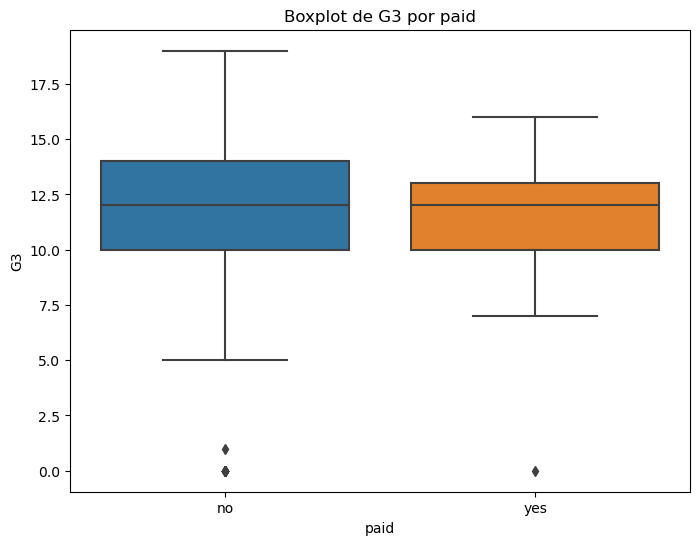

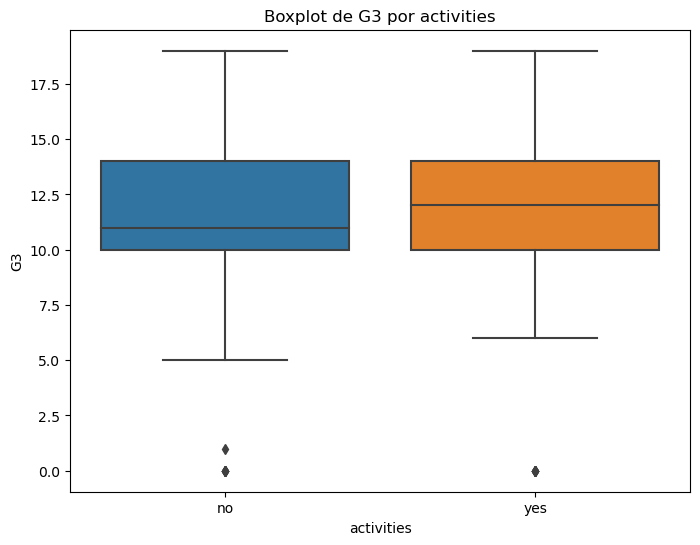

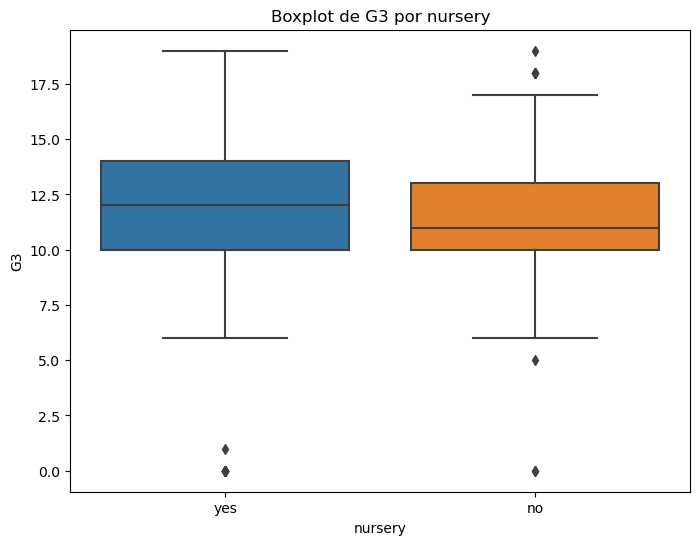

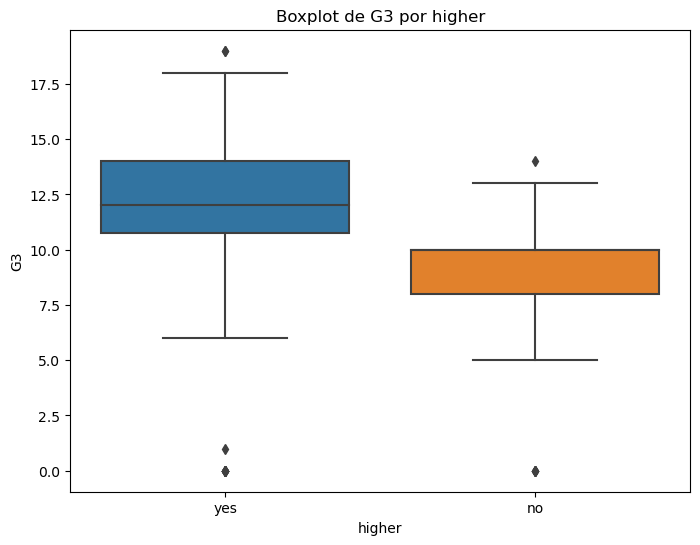

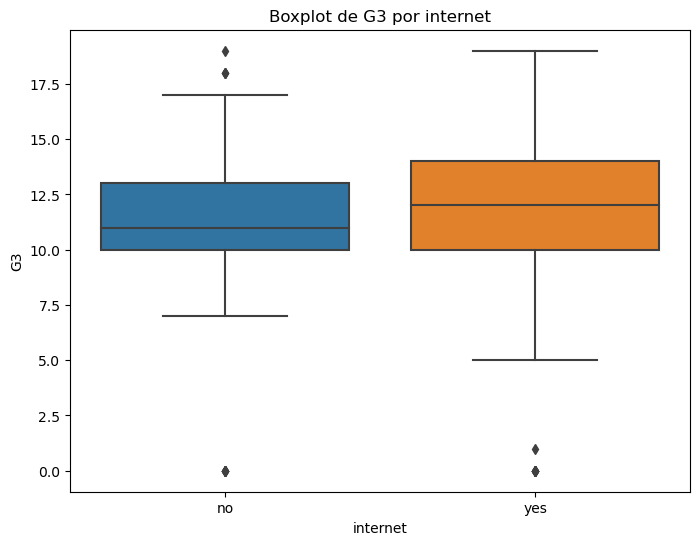

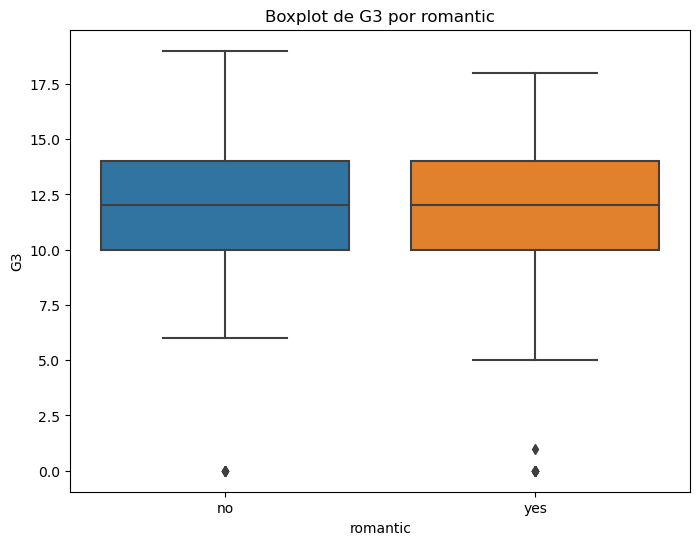

In [304]:
# 20. Boxplot numérico por categoría

for columna in discreta_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=columna, y='G3', data=df)
    plt.title(f'Boxplot de G3 por {columna}')
    plt.xlabel(columna)
    plt.ylabel('G3')
    plt.show()

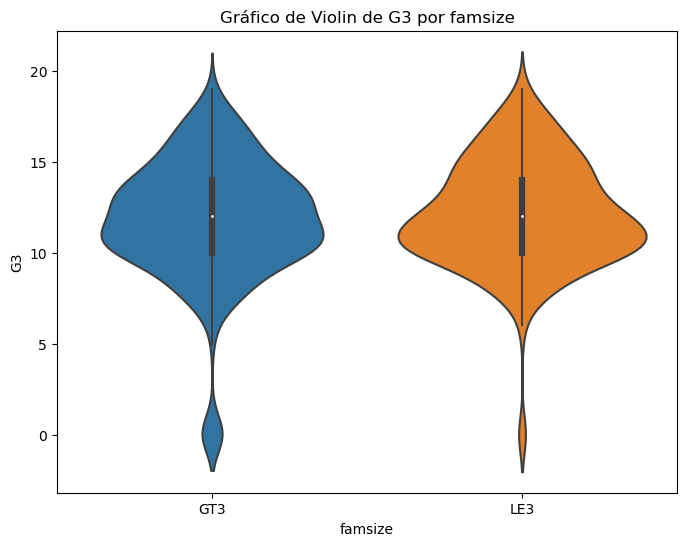

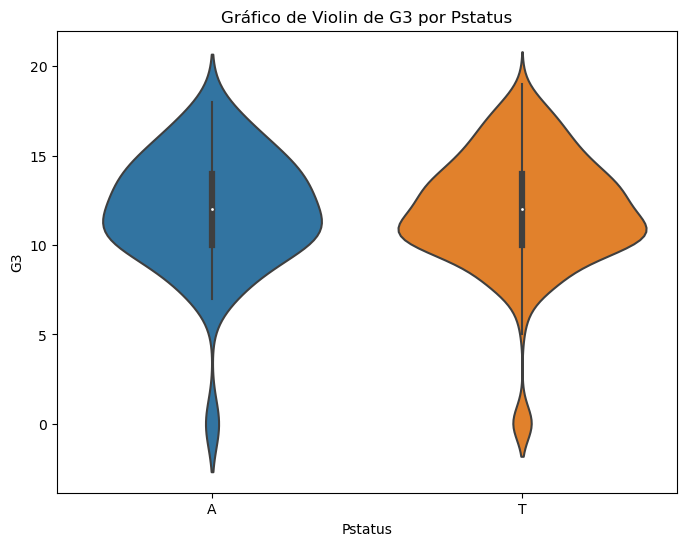

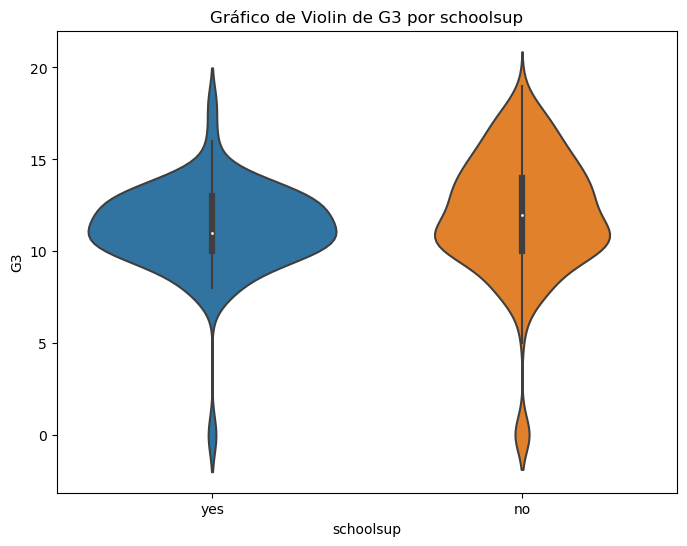

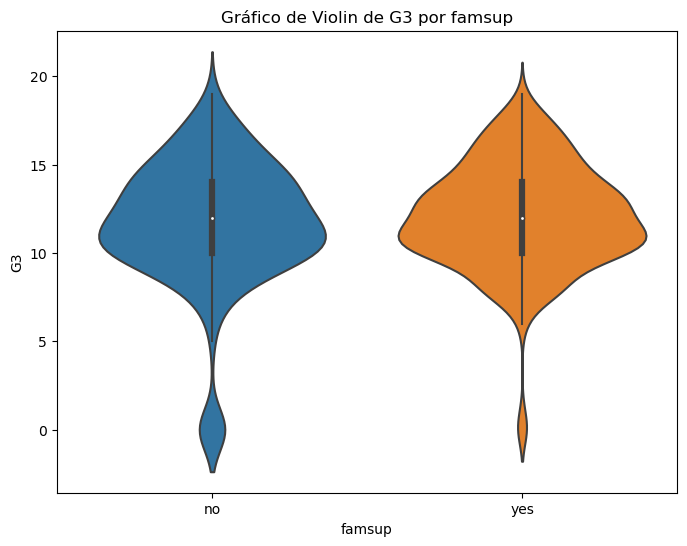

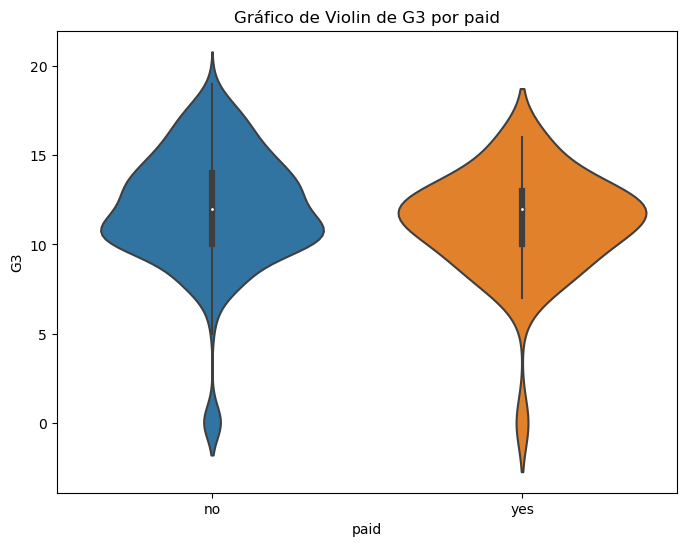

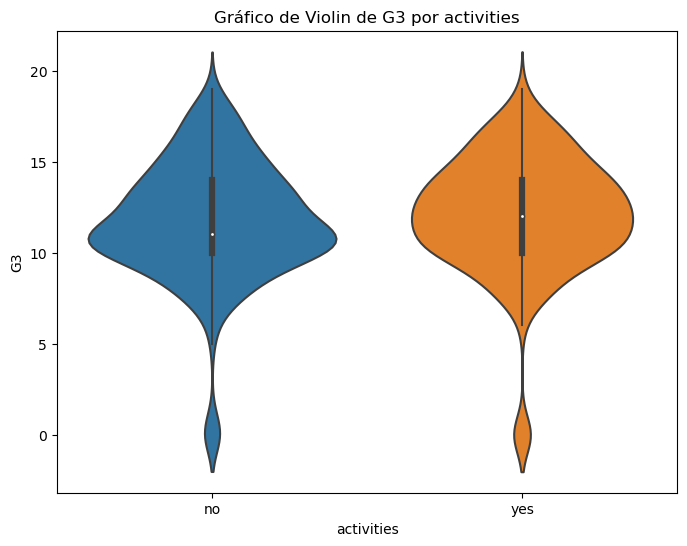

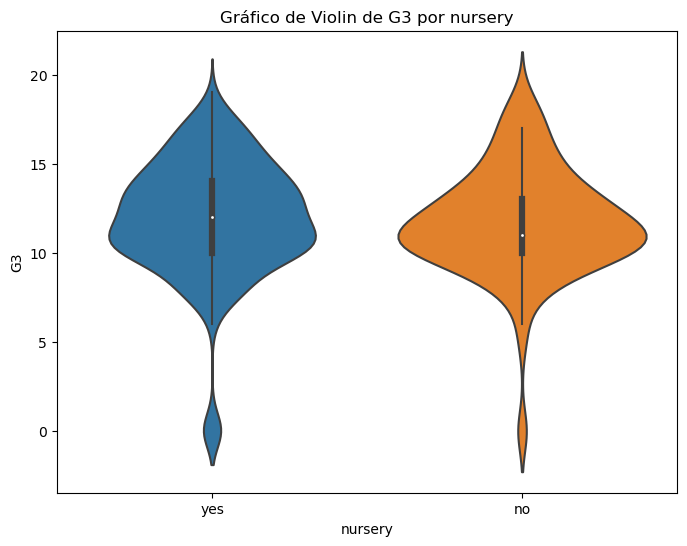

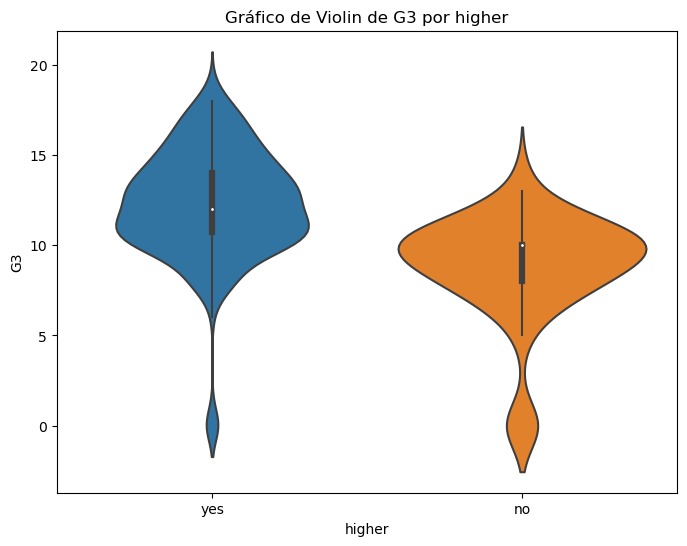

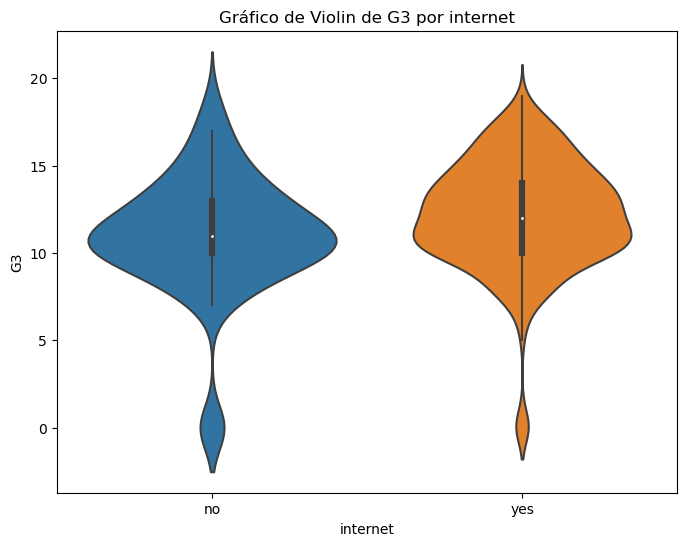

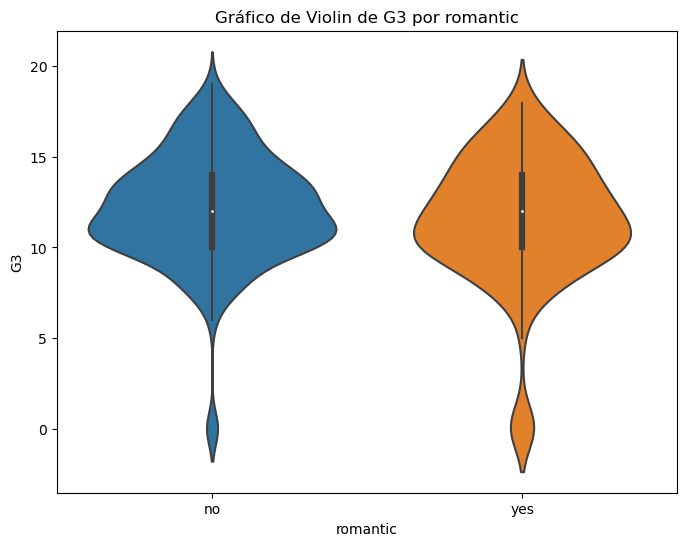

In [306]:
# 21. Gráfico de Violin por categoría
for columna in discreta_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=columna, y='G3', data=df)
    plt.title(f'Gráfico de Violin de G3 por {columna}')
    plt.xlabel(columna)
    plt.ylabel('G3')
    plt.show() 